In [259]:
# CLEAN UP
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("oh.csv")

df = df.rename(columns={
        "ItemNbr" : "Item",
        "Horizon" : "SupplyDelay",
        "FlwlineCode" : "Location",
})
df = df.drop(["#DIV/0!", "Unnamed: 41"], axis=1)
df = df[:3549]
df.head()

C:\Users\Tejas\AppData\Local\Temp\ipykernel_2904\2064357604.py:6: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("oh.csv")


,CCN,Item,Location,SupplyDelay,MnYr1,MnYr2,MnYr3,MnYr4,MnYr5,MnYr6,...,MnYr27,MnYr28,MnYr29,MnYr30,MnYr31,MnYr32,MnYr33,MnYr34,MnYr35,MnYr36
0,WHTN,1-1/2HHSJ-SS90960,FJ,8d,0,2,0.0,50.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WHTN,1-729-AL,TC,15d,21,51,18.0,32.0,7.0,51.0,...,39.0,24.0,19.0,17.0,14.0,12.0,16.0,47.0,18.0,21.0
2,WHTN,1/2BSJ-SS120120,FJ,25d,0,0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3,WHTN,1/2BSJ-SS120164,FJ,25d,0,0,8.0,10.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,7.0,23.0,0.0,0.0,0.0
4,WHTN,1/2BSJ-SS180120,FJ,25d,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
fetchRowDataFrom = 25 # row in the CSV we will fetch data from

months = list(range(1, 37)) # months 1 => 36
returnData = df.values.astype(str).tolist()[fetchRowDataFrom-2]
supplyRate = returnData[3]
saleValues = [(float(x)) for x in returnData[4:]]

# plt.plot(months, saleValues)
# plt.show()

new_df = pd.DataFrame({
    'Demand': saleValues,
})


In [261]:
from statsmodels.tsa.stattools import adfuller

In [262]:
test_results = adfuller(saleValues)
test_results

(-3.855789118898924,
 0.002385411823255866,
 6,
 29,
 {'1%': -3.6790595944893187,
  '5%': -2.9678817237279103,
  '10%': -2.6231583472057074},
 378.61358025484327)

In [263]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [264]:
adfuller_test(saleValues)

ADF Test Statistic : -3.855789118898924
p-value : 0.002385411823255866
#Lags Used : 6
Number of Observations Used : 29
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


c:\Users\Tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Tejas\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


36

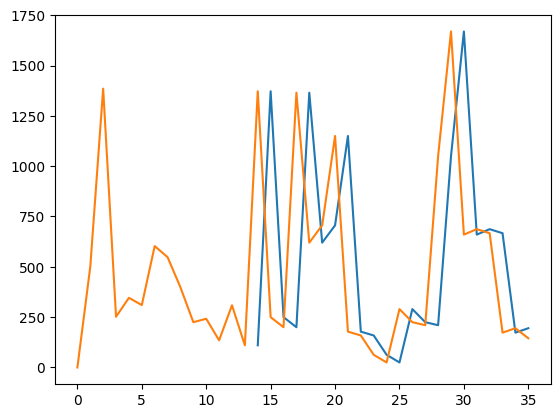

In [283]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(new_df['Demand'], order=(1,1,1), seasonal_order=(1,1,1,36))
results = model.fit()

new_df['Forecast'] = results.predict(start=14, end=60, dynamic=False)
new_df['Forecast'].plot() 
new_df['Demand'].plot() 

len(new_df['Forecast'].tolist())